# Image Classification

#### First we find a dog and cat dataset 
#### Then we try prediction using SVM 
#### Then we try prediction using CNN 
#### Improve the model maybe?
#### Configure for local host deployment



https://www.kaggle.com/datasets/samuelcortinhas/cats-and-dogs-image-classification

https://www.tensorflow.org/tutorials/images/classification

In [1]:
#https://www.kaggle.com/general/74235
! pip install -q kaggle

In [2]:
from google.colab import files

files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"rohitsanjay","key":"3fb8777fc3a939d7155a983a5144bda3"}'}

In [3]:
! mkdir ~/.kaggle

! cp kaggle.json ~/.kaggle/

! chmod 600 ~/.kaggle/kaggle.json

! kaggle datasets download -d samuelcortinhas/cats-and-dogs-image-classification

 88% 57.0M/64.4M [00:00<00:00, 131MB/s]
100% 64.4M/64.4M [00:00<00:00, 106MB/s]


In [4]:
import zipfile

zip_file_path = "/content/cats-and-dogs-image-classification.zip"  # Replace with the actual path to the zip file

# Open the zip file
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    # Extract all files in the zip
    zip_ref.extractall()

# Playing with the Image

In [5]:
import cv2
import matplotlib.pyplot as plt


cnn


In [6]:
import pathlib
data_train = pathlib.Path("/content/train")
image_count = len(list(data_train.glob('*/*.jpg')))
print(image_count)

557


In [7]:
import pathlib
data_test = pathlib.Path("/content/test")
image_count = len(list(data_test.glob('*/*.jpg')))
print(image_count)

140


In [8]:
import tensorflow as tf
from tensorflow import keras
from keras.utils import image_dataset_from_directory

In [9]:
train_images = image_dataset_from_directory(data_train, validation_split=0.2, subset="training", image_size=(180, 180), batch_size = 32, seed=42)
val_images = image_dataset_from_directory(data_train, validation_split=0.2, subset="validation",image_size=(180, 180), batch_size = 32,seed=42)
test_images = image_dataset_from_directory(data_test, image_size=(180, 180), batch_size = 32)
labels = train_images.class_names
print(labels)

Found 557 files belonging to 2 classes.
Using 446 files for training.
Found 557 files belonging to 2 classes.
Using 111 files for validation.
Found 140 files belonging to 2 classes.
['cats', 'dogs']


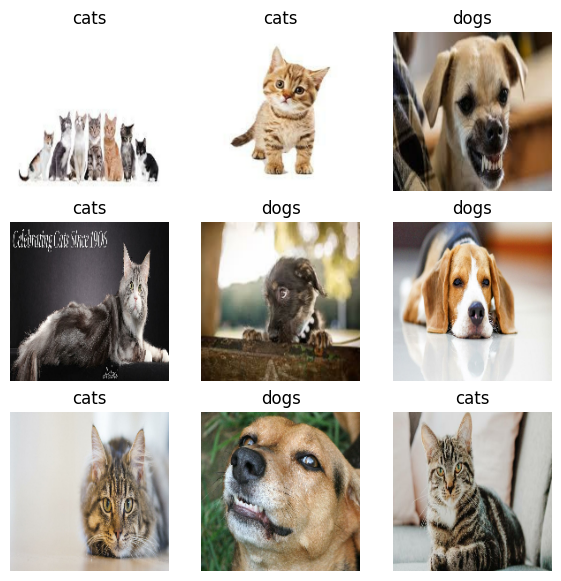

In [10]:
plt.figure(figsize=(7,7))
for images, label in train_images.take(1):
  for i in range(9):
    ax = plt.subplot(3,3,i+1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(labels[label[i]])
    plt.axis("off")


In [11]:
for image_batch, labels_batch in train_images:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(32, 180, 180, 3)
(32,)


In [12]:
# standardizing data
from keras.layers import Rescaling
import numpy as np
normalizing_layer = Rescaling(1./255)
normalizing_training_iamge = train_images.map(lambda x,y:(normalizing_layer(x),y))
image_batch, label_batch = next(iter(normalizing_training_iamge))
print(np.min(image_batch[0]),np.max(image_batch[0]))
print(image_batch.shape)

0.0 1.0
(32, 180, 180, 3)


In [13]:
from keras import Sequential
from keras import layers
from keras.layers import Conv2D, MaxPool2D, Dense, Flatten

In [14]:
num_labels = len(labels)
model = Sequential([
  layers.Rescaling(1./255, input_shape=(180, 180, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_labels, activation = "softmax")
])

In [15]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_1 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 180, 180, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 90, 90, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 90, 90, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 45, 45, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 45, 45, 64)        1

In [17]:
history = model.fit(train_images,validation_data=val_images, epochs=10)

Epoch 1/10
14/14 [==============================] - 25s 1s/step - loss: 0.8382 - accuracy: 0.5291 - val_loss: 0.6897 - val_accuracy: 0.5135
Epoch 2/10
14/14 [==============================] - 21s 1s/step - loss: 0.6865 - accuracy: 0.5359 - val_loss: 0.6951 - val_accuracy: 0.5135
Epoch 3/10
14/14 [==============================] - 20s 1s/step - loss: 0.6604 - accuracy: 0.6188 - val_loss: 0.6774 - val_accuracy: 0.6306
Epoch 4/10
14/14 [==============================] - 23s 1s/step - loss: 0.5870 - accuracy: 0.7063 - val_loss: 0.7908 - val_accuracy: 0.5315
Epoch 5/10
14/14 [==============================] - 19s 1s/step - loss: 0.4754 - accuracy: 0.7556 - val_loss: 0.6726 - val_accuracy: 0.6216
Epoch 6/10
14/14 [==============================] - 21s 1s/step - loss: 0.3219 - accuracy: 0.8722 - val_loss: 0.7535 - val_accuracy: 0.5586
Epoch 7/10
14/14 [==============================] - 19s 1s/step - loss: 0.2021 - accuracy: 0.9215 - val_loss: 1.1059 - val_accuracy: 0.6036
Epoch 8/10
14/14 [==

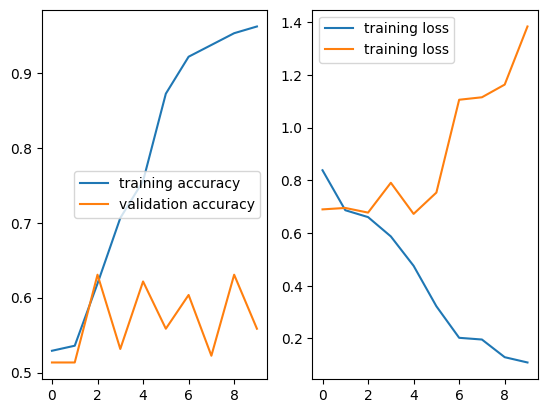

In [19]:
accuracy = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

r = range(10)
plt.subplot(1,2,1)
plt.plot(r, accuracy, label='training accuracy')
plt.plot(r, val_acc, label='validation accuracy')
plt.legend()
plt.subplot(1,2,2)
plt.plot(r, loss, label='training loss')
plt.plot(r, val_loss, label='training loss')
plt.legend()

5/5 [==============================] - 5s 792ms/step


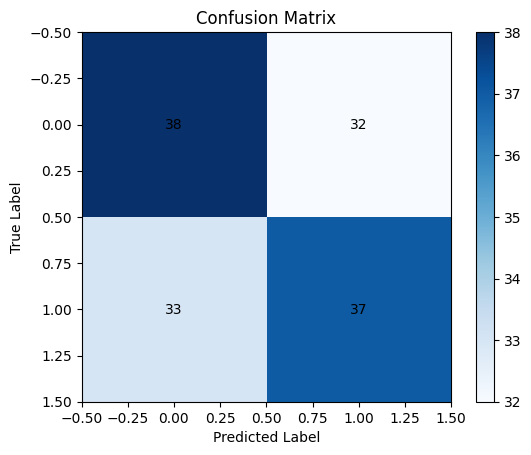

Precision: 0.5362318840579711
Recall: 0.5285714285714286
F1 Score: 0.5323741007194245


In [20]:
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix
# Retrieve the true labels from the test dataset
true_labels = []
for images, labels in test_images:
    true_labels.extend(labels.numpy())

"""predictions = model_withoutoverfitting.predict(test_images)
predicted_labels = np.round(predictions).flatten() """ # Convert probabilities to binary labelst
predictions = model.predict(test_images)
predicted_labels = np.argmax(predictions, axis=1)
cm = confusion_matrix(true_labels, predicted_labels)
plt.imshow(cm, cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

# Add text annotations
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, str(cm[i, j]), ha='center', va='center', color='black')

plt.show()



from sklearn.metrics import precision_score, recall_score, f1_score

# Calculate precision
precision = precision_score(true_labels, predicted_labels)

# Calculate recall
recall = recall_score(true_labels, predicted_labels)

# Calculate F1 score
f1 = f1_score(true_labels, predicted_labels)

print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

removing overfitting

In [43]:
train_images = image_dataset_from_directory(data_train, validation_split=0.2, subset="training", image_size=(224, 224), batch_size = 32, seed=42)
val_images = image_dataset_from_directory(data_train, validation_split=0.2, subset="validation",image_size=(224, 224), batch_size = 32,seed=42)
test_images = image_dataset_from_directory(data_test, image_size=(224, 224), batch_size = 32)
labels = train_images.class_names

Found 557 files belonging to 2 classes.
Using 446 files for training.
Found 557 files belonging to 2 classes.
Using 111 files for validation.
Found 140 files belonging to 2 classes.


In [44]:
data_augmenting = Sequential([
    layers.RandomFlip("horizontal", input_shape=(224, 224, 3)),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.2)
])

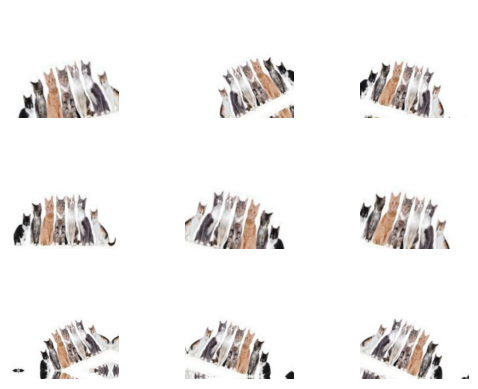

In [45]:
for images, _ in train_images.take(1):
  for i in range(9):
    aug_image = data_augmenting(images)
    ax = plt.subplot(3,3,i+1)
    plt.imshow(aug_image[0].numpy().astype("uint8"))
    plt.axis("off")

In [46]:
"""# Model with dropout and data augmenting
model_withoutoverfitting = Sequential([
  data_augmenting,
  layers.Rescaling(1./255, input_shape=(180, 180, 3)),
  layers.Conv2D(16, (3,3),padding="same", activation="relu"),
  layers.MaxPool2D(),
  layers.Conv2D(32, (3,3),padding="same", activation="relu"),
  layers.MaxPool2D(),
  layers.Conv2D(64, (3,3),padding="same", activation="relu"),
  layers.MaxPool2D(),
  layers.Conv2D(128, (3,3),padding="same", activation="relu"),
  layers.MaxPool2D(),
  layers.Dropout(0.1),
  layers.Flatten(),
  layers.Dense(128, activation='sigmoid'),
  layers.Dense(1, activation='sigmoid'),
]) """

'# Model with dropout and data augmenting\nmodel_withoutoverfitting = Sequential([\n  data_augmenting,\n  layers.Rescaling(1./255, input_shape=(180, 180, 3)),\n  layers.Conv2D(16, (3,3),padding="same", activation="relu"),\n  layers.MaxPool2D(),\n  layers.Conv2D(32, (3,3),padding="same", activation="relu"),\n  layers.MaxPool2D(),\n  layers.Conv2D(64, (3,3),padding="same", activation="relu"),\n  layers.MaxPool2D(),\n  layers.Conv2D(128, (3,3),padding="same", activation="relu"),\n  layers.MaxPool2D(),\n  layers.Dropout(0.1),\n  layers.Flatten(),\n  layers.Dense(128, activation=\'sigmoid\'),\n  layers.Dense(1, activation=\'sigmoid\'),\n]) '

In [183]:
model_withoutoverfitting = Sequential([
  data_augmenting,
  layers.Rescaling(1./255, input_shape=(224, 224, 3)),
  layers.Conv2D(16, (3,3),strides=1, padding="same", activation="relu"),
  layers.MaxPool2D(),
  layers.Conv2D(32, (3,3),strides=2,padding="same", activation="relu"),
  layers.MaxPool2D(),
  layers.Conv2D(64, (3,3),strides=3, padding="same", activation="relu"),
  layers.MaxPool2D(),
  layers.Conv2D(128, (3,3),strides=4, padding="same", activation="relu"),
  layers.MaxPool2D(),
  layers.Dropout(0.1),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(2, activation='softmax'),
])

In [184]:
model_withoutoverfitting.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

In [185]:
model_withoutoverfitting.summary()

Model: "sequential_47"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_5 (Sequential)   (None, 224, 224, 3)       0         
                                                                 
 rescaling_47 (Rescaling)    (None, 224, 224, 3)       0         
                                                                 
 conv2d_242 (Conv2D)         (None, 224, 224, 16)      448       
                                                                 
 max_pooling2d_159 (MaxPooli  (None, 112, 112, 16)     0         
 ng2D)                                                           
                                                                 
 conv2d_243 (Conv2D)         (None, 56, 56, 32)        4640      
                                                                 
 max_pooling2d_160 (MaxPooli  (None, 28, 28, 32)       0         
 ng2D)                                               

In [186]:
history_withoutoverfitting = model_withoutoverfitting.fit(train_images, epochs=25, validation_data=val_images)

Epoch 1/25
14/14 [==============================] - 26s 1s/step - loss: 0.6975 - accuracy: 0.4821 - val_loss: 0.6881 - val_accuracy: 0.5135
Epoch 2/25
14/14 [==============================] - 22s 2s/step - loss: 0.6980 - accuracy: 0.5000 - val_loss: 0.6907 - val_accuracy: 0.5946
Epoch 3/25
14/14 [==============================] - 23s 1s/step - loss: 0.6913 - accuracy: 0.5112 - val_loss: 0.6869 - val_accuracy: 0.5135
Epoch 4/25
14/14 [==============================] - 21s 1s/step - loss: 0.6869 - accuracy: 0.5247 - val_loss: 0.6665 - val_accuracy: 0.6126
Epoch 5/25
14/14 [==============================] - 22s 2s/step - loss: 0.6758 - accuracy: 0.6076 - val_loss: 0.6497 - val_accuracy: 0.6667
Epoch 6/25
14/14 [==============================] - 22s 1s/step - loss: 0.6645 - accuracy: 0.5987 - val_loss: 0.6570 - val_accuracy: 0.6667
Epoch 7/25
14/14 [==============================] - 21s 1s/step - loss: 0.6550 - accuracy: 0.6368 - val_loss: 0.6502 - val_accuracy: 0.6216
Epoch 8/25
14/14 [==

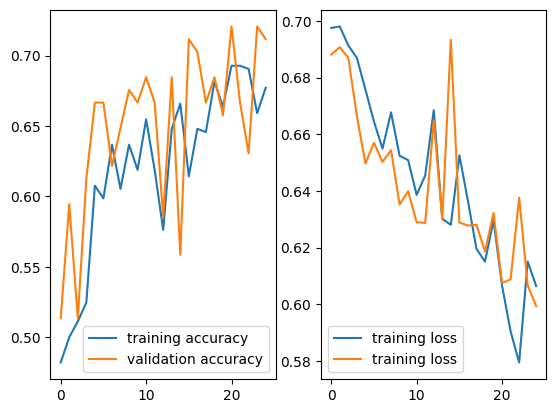

In [187]:
accuracy = history_withoutoverfitting.history['accuracy']
val_acc = history_withoutoverfitting.history['val_accuracy']
loss = history_withoutoverfitting.history['loss']
val_loss = history_withoutoverfitting.history['val_loss']

r = range(25)
plt.subplot(1,2,1)
plt.plot(r, accuracy, label='training accuracy')
plt.plot(r, val_acc, label='validation accuracy')
plt.legend()
plt.subplot(1,2,2)
plt.plot(r, loss, label='training loss')
plt.plot(r, val_loss, label='training loss')
plt.legend()

5/5 [==============================] - 2s 259ms/step


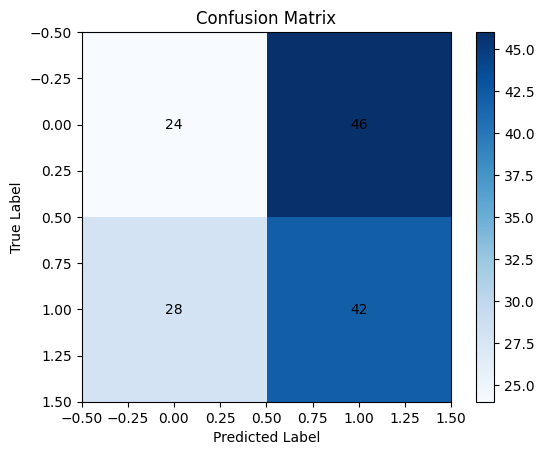

Precision: 0.4772727272727273
Recall: 0.6
F1 Score: 0.5316455696202532


In [188]:
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix
# Retrieve the true labels from the test dataset
true_labels = []
for images, labels in test_images:
    true_labels.extend(labels.numpy())

"""predictions = model_withoutoverfitting.predict(test_images)
predicted_labels = np.round(predictions).flatten() """ # Convert probabilities to binary labelst
predictions = model_withoutoverfitting.predict(test_images)
predicted_labels = np.argmax(predictions, axis=1)
cm = confusion_matrix(true_labels, predicted_labels)
plt.imshow(cm, cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

# Add text annotations
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, str(cm[i, j]), ha='center', va='center', color='black')

plt.show()



from sklearn.metrics import precision_score, recall_score, f1_score

# Calculate precision
precision = precision_score(true_labels, predicted_labels)

# Calculate recall
recall = recall_score(true_labels, predicted_labels)

# Calculate F1 score
f1 = f1_score(true_labels, predicted_labels)

print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Using pretrained model


In [31]:
train_images = image_dataset_from_directory(data_train, validation_split=0.2, subset="training", image_size=(224, 224), batch_size = 32, seed=42)
val_images = image_dataset_from_directory(data_train, validation_split=0.2, subset="validation",image_size=(224, 224), batch_size = 32,seed=42)
test_images = image_dataset_from_directory(data_test, image_size=(224, 224), batch_size = 32)
labels = train_images.class_names

Found 557 files belonging to 2 classes.
Using 446 files for training.
Found 557 files belonging to 2 classes.
Using 111 files for validation.
Found 140 files belonging to 2 classes.


In [32]:
data_augmenting = Sequential([
    layers.RandomFlip("horizontal", input_shape=(224, 224, 3)),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.2)
])

In [33]:
from keras.applications import VGG16
pretrained_model = VGG16()

553467096/553467096 [==============================] - 6s 0us/step


In [34]:
for layer in pretrained_model.layers:
    layer.trainable = False

In [35]:
pre_model = tf.keras.Sequential([
    data_augmenting,
    pretrained_model,
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(2, activation='softmax')
])

In [36]:
pre_model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

In [37]:
pre_model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_3 (Sequential)   (None, 224, 224, 3)       0         
                                                                 
 vgg16 (Functional)          (None, 1000)              138357544 
                                                                 
 flatten_2 (Flatten)         (None, 1000)              0         
                                                                 
 dense_4 (Dense)             (None, 256)               256256    
                                                                 
 dense_5 (Dense)             (None, 2)                 514       
                                                                 
Total params: 138,614,314
Trainable params: 256,770
Non-trainable params: 138,357,544
_________________________________________________________________


In [39]:
history_pre_model= pre_model.fit(train_images, epochs=5, validation_data=test_images)

Epoch 1/5
14/14 [==============================] - 334s 24s/step - loss: 0.6714 - accuracy: 0.7511 - val_loss: 0.6376 - val_accuracy: 0.8786
Epoch 2/5
14/14 [==============================] - 330s 24s/step - loss: 0.6214 - accuracy: 0.8543 - val_loss: 0.5751 - val_accuracy: 0.8714
Epoch 3/5
14/14 [==============================] - 330s 24s/step - loss: 0.5511 - accuracy: 0.8632 - val_loss: 0.4912 - val_accuracy: 0.8714
Epoch 4/5
14/14 [==============================] - 330s 24s/step - loss: 0.4669 - accuracy: 0.8901 - val_loss: 0.4132 - val_accuracy: 0.8714
Epoch 5/5
14/14 [==============================] - 325s 24s/step - loss: 0.3879 - accuracy: 0.8812 - val_loss: 0.3595 - val_accuracy: 0.8500


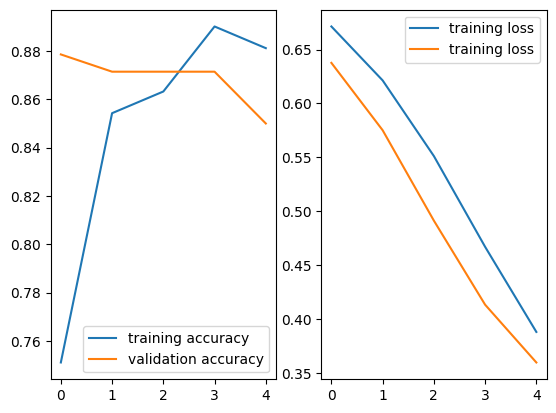

In [40]:
accuracy = history_pre_model.history['accuracy']
val_acc = history_pre_model.history['val_accuracy']
loss = history_pre_model.history['loss']
val_loss = history_pre_model.history['val_loss']

r = range(5)
plt.subplot(1,2,1)
plt.plot(r, accuracy, label='training accuracy')
plt.plot(r, val_acc, label='validation accuracy')
plt.legend()
plt.subplot(1,2,2)
plt.plot(r, loss, label='training loss')
plt.plot(r, val_loss, label='training loss')
plt.legend()

5/5 [==============================] - 77s 15s/step


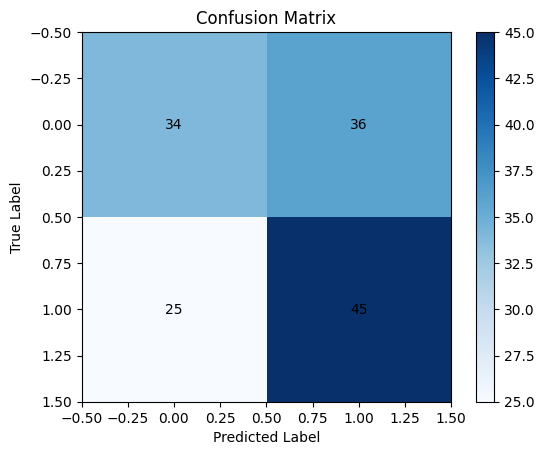

Precision: 0.5555555555555556
Recall: 0.6428571428571429
F1 Score: 0.5960264900662252


In [42]:
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix
# Retrieve the true labels from the test dataset
true_labels = []
for images, labels in test_images:
    true_labels.extend(labels.numpy())

"""predictions = model_withoutoverfitting.predict(test_images)
predicted_labels = np.round(predictions).flatten() """ # Convert probabilities to binary labelst
predictions = pre_model.predict(test_images)
predicted_labels = np.argmax(predictions, axis=1)
cm = confusion_matrix(true_labels, predicted_labels)
plt.imshow(cm, cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

# Add text annotations
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, str(cm[i, j]), ha='center', va='center', color='black')

plt.show()



from sklearn.metrics import precision_score, recall_score, f1_score

# Calculate precision
precision = precision_score(true_labels, predicted_labels)

# Calculate recall
recall = recall_score(true_labels, predicted_labels)

# Calculate F1 score
f1 = f1_score(true_labels, predicted_labels)

print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

https://www.kaggle.com/code/sasakitetsuya/dog-and-cat-classification-by-mobilenet

https://www.kaggle.com/code/samuelcortinhas/cats-and-dogs-binary-classification

https://www.kaggle.com/code/celebi07/catsdogsvgg16

refer the above to and notice how they use different compliing loss and uses numlabels with softmax

Note to self, you need to convert the shape to 224 x 224

Implement a confusion matrix and explain precision and recall for metrics

set up a validation dataset